# **Importing Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# **Importing and understanding Dataset**

In [ ]:
ds = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/insurance.csv', sep = ',')
ds.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Size of dataset:

In [ ]:
ds.shape

(1338, 7)

In [ ]:
ds.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Checking for missing values and datatypes:**

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are no missing values, and we have three features of data type object, namely sex, smoker, region. These are categorical data.

**Assigning values to object data:**

In [ ]:
ds["sex"].unique()

array(['female', 'male'], dtype=object)

In [ ]:
ds["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
ds["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
ds['sex'] = ds['sex'].map({'male': 0, 'female': 1})
ds['smoker'] = ds['smoker'].map({'no': 0, 'yes': 1})
ds['region'] = ds['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})
ds.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


Again verifying data type of features:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc30dfb96d0>,
      dtype=object)

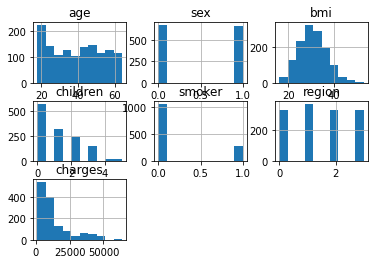

In [ ]:
ds.info()
ds.hist()

**Viewing distributions of the features and target variable:**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


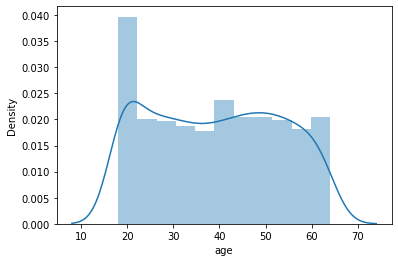

In [ ]:
sns.distplot(ds["age"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


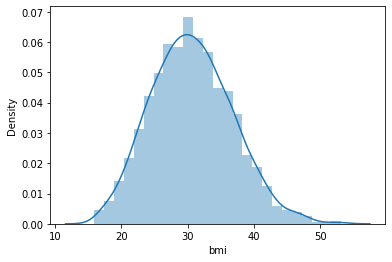

In [ ]:
sns.distplot(ds["bmi"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


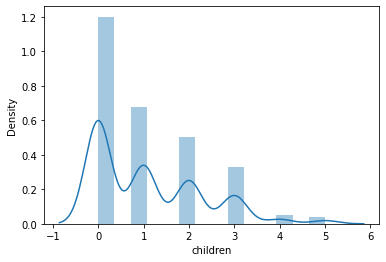

In [ ]:
sns.distplot(ds["children"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


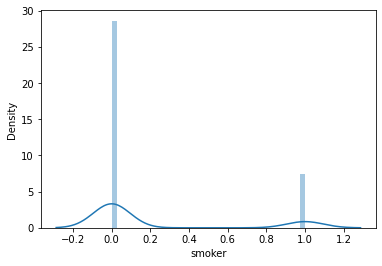

In [ ]:
sns.distplot(ds["smoker"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


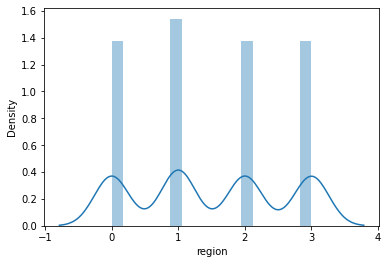

In [ ]:
sns.distplot(ds["region"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


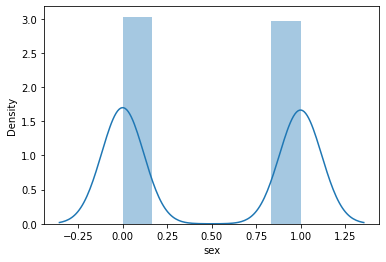

In [ ]:
sns.distplot(ds["sex"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


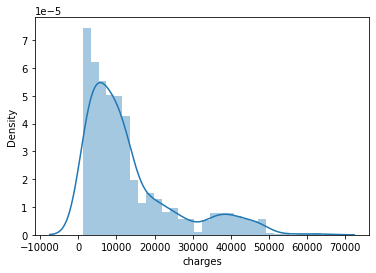

In [ ]:
sns.distplot(ds["charges"])

**Checking correlation of features with the target variable:**

In [ ]:
print(ds.corr()["charges"].abs().sort_values(ascending=False))

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region      0.006208
Name: charges, dtype: float64


Smoker status has the highest correlation with the target variable (charges)

**Correlation Matrix:**

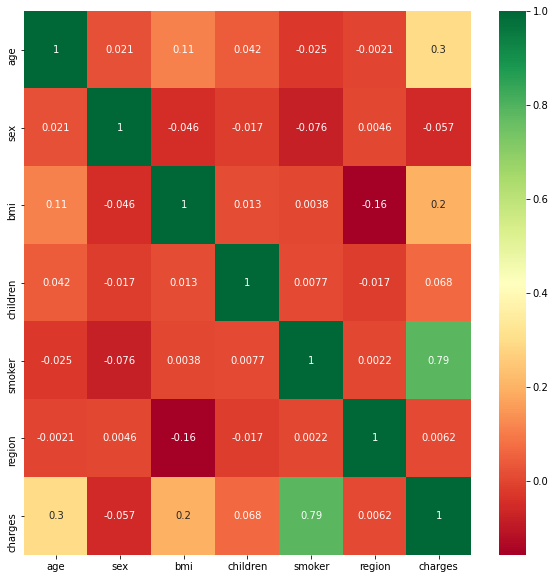

In [ ]:
corrmat = ds.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(ds[top_corr_features].corr(),annot=True,cmap="RdYlGn")

A correlation greater than 0.85 is not present. The features are moderately correlated or weakly correlated.

**Visualizing the distribution of charges with respect to individual features:**

This is used for categorical data.

1)Sex:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


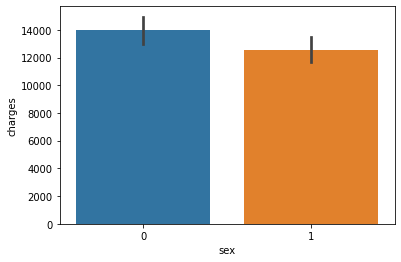

In [ ]:
y = ds["charges"]
sns.barplot(ds["sex"],y)

The charges for males are only slightly higher than that for females.

2)Smoker Status:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


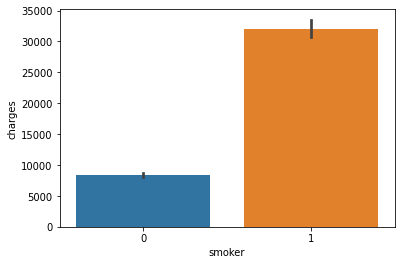

In [ ]:
sns.barplot(ds["smoker"],y)

The charges are higher for smokers.

3)Region:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


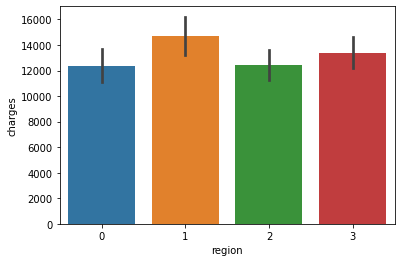

In [ ]:
sns.barplot(ds["region"],y)

The charges are nearly the same across regions, southeast having slightly higher charges followed by northeast.

4) Children:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


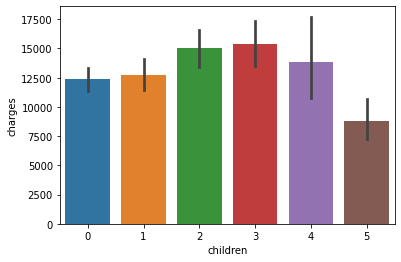

In [ ]:
sns.barplot(ds["children"],y)

# **Data Processing**

The features age, bmi are to be normalised. Dummy variables are created for the nominal categorical features, namely: region, sex, smoker status



In [ ]:
#dummy coding for nominal data
ds = pd.get_dummies(ds, columns=['sex','smoker','region'])
ds.head()

,age,bmi,children,charges,sex_0,sex_1,smoker_0,smoker_1,region_0,region_1,region_2,region_3
0,19,27.900,0,16884.92400,0,1,0,1,1,0,0,0
1,18,33.770,1,1725.55230,1,0,1,0,0,1,0,0
2,28,33.000,3,4449.46200,1,0,1,0,0,1,0,0
3,33,22.705,0,21984.47061,1,0,1,0,0,0,1,0
4,32,28.880,0,3866.85520,1,0,1,0,0,0,1,0


Splitting data into train and test set:

In [ ]:
from sklearn.model_selection import train_test_split
dataset_train, dataset_test = train_test_split(ds, test_size=0.2, train_size=0.8, random_state=42)

Standardising continuous variables:

In [ ]:
standardScaler = MinMaxScaler()
columns_to_scale = ['age', 'bmi', 'charges']
dataset_train[columns_to_scale] = standardScaler.fit_transform(dataset_train[columns_to_scale])
dataset_test[columns_to_scale] = standardScaler.fit_transform(dataset_test[columns_to_scale])
dataset_train.head()
dataset_test.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,age,bmi,children,charges,sex_0,sex_1,smoker_0,smoker_1,region_0,region_1,region_2,region_3
764,0.586957,0.233748,2,0.127134,0,1,1,0,0,0,0,1
887,0.391304,0.369216,0,0.066104,0,1,1,0,0,0,1,0
890,1.000000,0.281560,0,0.450191,0,1,0,1,0,0,1,0
1293,0.608696,0.249685,3,0.130436,1,0,1,0,0,0,1,0
259,0.021739,0.422340,0,0.520743,1,0,0,1,0,0,1,0


Dividing into X_train, y_train, X_test, y_test:

In [ ]:
y_train = dataset_train.pop('charges')
X_train = dataset_train

y_test = dataset_test.pop('charges')
X_test = dataset_test

ds[columns_to_scale] = standardScaler.fit_transform(ds[columns_to_scale])
y = ds.pop('charges')
X = ds

# **Fitting Linear Regression Model:**


In [ ]:
lm = LinearRegression()
scores = cross_val_score(lm, X, y, scoring='r2', cv=10)
print(scores)
print('Linear Regression model with cross-validation on train set gives mean R-2 score of ',round(scores.mean(),2))

[0.78599896 0.73249853 0.73491249 0.66880787 0.77174242 0.78401994
 0.79314562 0.66869189 0.74242455 0.76276472]
Linear Regression model with cross-validation on train set gives mean R-2 score of  0.74


Lets consider only some features and build a regression model. RFE is used.

In [ ]:
# step-1: create a cross-validation scheme
from sklearn.model_selection import KFold
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1,12))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X, y)
from sklearn.feature_selection import RFE
rfe = RFE(lm)

# 3.2 call GridSearchCV()
from sklearn.model_selection import GridSearchCV
model_cv = GridSearchCV(estimator = rfe,
                        param_grid = hyper_params,
                        scoring= 'r2',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X, y)

Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    1.4s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.013801,0.001741,0.001548,0.000177,1,{'n_features_to_select': 1},0.623730,0.720859,0.526084,0.346647,0.601758,0.703355,0.566889,0.537493,0.628570,0.668433,0.592382,0.102679,11,0.619294,0.605111,0.627496,0.636095,0.621722,0.601721,0.625173,0.628446,0.617394,0.614418,0.619687,0.010048
1,0.012886,0.001236,0.001708,0.000236,2,{'n_features_to_select': 2},0.617879,0.821089,0.682899,0.318943,0.601537,0.714474,0.576927,0.538273,0.660871,0.668433,0.620132,0.125240,9,0.617672,0.706910,0.724171,0.634550,0.620451,0.600206,0.666385,0.628348,0.656194,0.614418,0.646930,0.039146
2,0.012417,0.001342,0.001690,0.000237,3,{'n_features_to_select': 3},0.665778,0.821089,0.682899,0.354355,0.654545,0.788096,0.646906,-0.116223,0.758024,0.744431,0.599990,0.268288,10,0.726924,0.706910,0.724171,0.675522,0.658029,0.707142,0.757892,-0.095544,0.745491,0.718471,0.632501,0.244307
3,0.011424,0.003027,0.001613,0.000073,4,{'n_features_to_select': 4},0.703435,0.849598,0.732590,0.453424,0.769363,0.824576,0.646906,0.687314,0.758024,0.772512,0.719774,0.105961,7,0.751809,0.731083,0.747766,0.765476,0.744405,0.731699,0.757892,0.753661,0.745491,0.741199,0.747048,0.010287
4,0.009252,0.000634,0.001518,0.000101,5,{'n_features_to_select': 5},0.705164,0.854819,0.731057,0.450914,0.766559,0.822675,0.647287,0.685322,0.762052,0.775441,0.720129,0.107223,6,0.752138,0.732644,0.749062,0.766121,0.745236,0.732526,0.758610,0.754115,0.745797,0.744862,0.748111,0.009970
5,0.008213,0.000540,0.001564,0.000179,6,{'n_features_to_select': 6},0.707978,0.855288,0.733773,0.455114,0.766271,0.822622,0.650954,0.686870,0.762133,0.775737,0.721674,0.105921,5,0.752614,0.732659,0.751283,0.766499,0.745995,0.733288,0.760728,0.754888,0.746331,0.745529,0.748981,0.010192
6,0.007695,0.000855,0.001597,0.000212,7,{'n_features_to_select': 7},0.707634,0.854157,0.731266,0.358778,0.776309,0.823206,0.651319,0.690726,0.756097,0.776106,0.712560,0.131169,8,0.754998,0.732710,0.751532,0.710769,0.741493,0.735796,0.760854,0.756908,0.749239,0.747933,0.744223,0.014058
7,0.006526,0.000440,0.001522,0.000118,8,{'n_features_to_select': 8},0.708043,0.857963,0.733616,0.463526,0.771543,0.823251,0.652865,0.691259,0.755454,0.776288,0.723381,0.103972,1,0.755070,0.735318,0.751676,0.768406,0.747915,0.735910,0.760903,0.756943,0.749281,0.748028,0.750945,0.009738
8,0.005419,0.000385,0.001535,0.000108,9,{'n_features_to_select': 9},0.708043,0.857963,0.733422,0.463526,0.771543,0.823251,0.652391,0.691259,0.755454,0.776288,0.723314,0.104003,2,0.755070,0.735318,0.751722,0.768406,0.747915,0.735910,0.760978,0.756943,0.749281,0.748028,0.750957,0.009746
9,0.006249,0.002725,0.001544,0.000177,10,{'n_features_to_select': 10},0.708111,0.857980,0.733422,0.462379,0.771382,0.822707,0.652391,0.691180,0.754747,0.776428,0.723073,0.104219,3,0.755070,0.735344,0.751722,0.768420,0.747967,0.736013,0.760978,0.756986,0.749361,0.748042,0.750990,0.009728


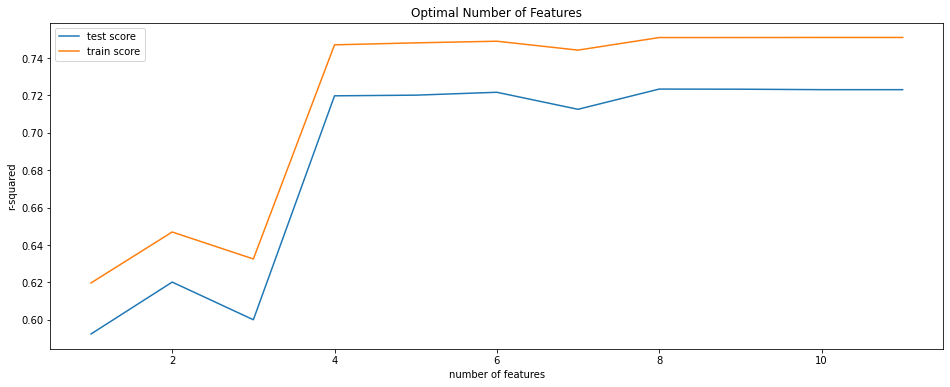

In [ ]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

We can choose the number of optimal features from the above plot

In [ ]:
#r2 score on test-train set without cross-validation
n_features_optimal = 4

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(round(r2,2))

0.77


In [ ]:
# tuples of (feature name, whether selected, ranking)
# note that the 'rank' is > 1 for non-selected features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('age', True, 1),
 ('bmi', True, 1),
 ('children', False, 3),
 ('sex_0', False, 8),
 ('sex_1', False, 7),
 ('smoker_0', True, 1),
 ('smoker_1', True, 1),
 ('region_0', False, 4),
 ('region_1', False, 5),
 ('region_2', False, 6),
 ('region_3', False, 2)]

Features not selected show 'False'


In [ ]:
#cross-validation mean score with RFE:
scores_rfe = cross_val_score(rfe, X, y, scoring='r2', cv=10)
print(scores_rfe)
print('Linear regression after RFE and on cross-validation gives mean R-2 score ',round(scores_rfe.mean(),2))

[0.78830669 0.73116608 0.73547149 0.67682853 0.76783033 0.77553635
 0.78555856 0.66752792 0.7454301  0.75863314]
Linear regression after RFE and on cross-validation gives mean R-2 score  0.74


# **Fitting Polynomial Regression model:**


In [ ]:
degrees = [1, 2, 3, 4, 5, 6]

# initialise y_train_pred and y_test_pred matrices to store the train and test predictions
# each row is a data point, each column a prediction using a polynomial of some degree
import numpy as np
y_train_pred = np.zeros((len(X_train), len(degrees)))
y_test_pred = np.zeros((len(X_test), len(degrees)))
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

for i, degree in enumerate(degrees):

    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)

    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = model.predict(X_train)
    y_test_pred[:, i] = model.predict(X_test)

In [ ]:
# compare r2 for train and test sets (for all polynomial fits)
print("R-squared values: \n")

for i, degree in enumerate(degrees):
    train_r2 = round(r2_score(y_train, y_train_pred[:, i]), 2)
    test_r2 = round(r2_score(y_test, y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, train_r2, test_r2))

R-squared values: 

Polynomial degree 1: train score=0.74, test score=0.78
Polynomial degree 2: train score=0.84, test score=0.86
Polynomial degree 3: train score=0.85, test score=0.84
Polynomial degree 4: train score=0.88, test score=0.73
Polynomial degree 5: train score=0.91, test score=-0.54
Polynomial degree 6: train score=0.95, test score=-43762.2


A polynomial fit of degree 2 gives a higher test score, while that of degree >4 tends to overfit (High train score but low test score)

Final Polynomial Regression model with degree = 2:

In [ ]:
#without cross validation
pr = make_pipeline(PolynomialFeatures(degree = 2), LinearRegression())
pr.fit(X_train, y_train)
y_pred = pr.predict(X_test)
from sklearn.metrics import r2_score
r2_pr = round(r2_score(y_test, y_pred),2)
print('R-2 score on test set for polynomial regression is', r2_pr)


R-2 score on test set for polynomial regression is 0.86


In [ ]:
#with cross validation
scores_pr = cross_val_score(pr, X, y, scoring='r2', cv= 10)
print(scores_pr)
print('On cross validation on the train set, Polynomial regression gives mean R-2 score ',round(scores_pr.mean(),2))

[0.85872303 0.84486959 0.83059821 0.75829803 0.86751739 0.90119182
 0.85211085 0.78161268 0.83905833 0.82846089]
On cross validation on the train set, Polynomial regression gives mean R-2 score  0.84


# **Artificial Neural Network:**
Linear regression gives a R-2 score of about 0.76 while Polynomial regression gives R-2 score of 0.86. Let's check the score for ANN Regression.

In [ ]:
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
ds_ann = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/insurance.csv', sep = ',')
ds_ann.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
ds_ann['sex'] = ds_ann['sex'].map({'male': 0, 'female': 1})
ds_ann['smoker'] = ds_ann['smoker'].map({'no': 0, 'yes': 1})
ds_ann['region'] = ds_ann['region'].map({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4})
ds_ann.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [ ]:
X = ds_ann.drop(['charges'],axis=1)
y = ds_ann['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#columns_to_scale = ['age','bmi']
#X_train[columns_to_scale] = standardScaler.fit_transform(X_train[columns_to_scale])
#X_test[columns_to_scale] = standardScaler.fit_transform(X_test[columns_to_scale])

In [ ]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=[len(X.keys())]))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 42,049
Trainable params: 42,049
Non-trainable params: 0
_________________________________________________________________


In [ ]:
len(X_train)

1070

In [ ]:
from keras.optimizers import RMSprop
optimizers = RMSprop(learning_rate=0.01)
model.compile(loss='mse', optimizer=optimizers, metrics=['mse'])
ann = model.fit(X_train, y_train, epochs=500, batch_size=70,validation_split=0.15)
y_pred = model.predict(X_test)


Epoch 1/500
13/13 [==============================] - 1s 15ms/step - loss: 176914656.0000 - mse: 176914656.0000 - val_loss: 162013056.0000 - val_mse: 162013056.0000
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 125838456.0000 - mse: 125838456.0000 - val_loss: 184456768.0000 - val_mse: 184456768.0000
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 121964680.0000 - mse: 121964680.0000 - val_loss: 159169328.0000 - val_mse: 159169312.0000
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 123943880.0000 - mse: 123943880.0000 - val_loss: 157661728.0000 - val_mse: 157661728.0000
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 122546896.0000 - mse: 122546912.0000 - val_loss: 161576000.0000 - val_mse: 161576000.0000
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 119972192.0000 - mse: 119972192.0000 - val_loss: 159129008.0000 - val_mse: 159129008.0000
Epoch 7/500
13/13 [==

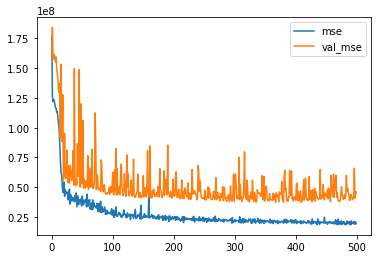

In [ ]:
# "Loss"
pd.DataFrame(ann.history)[['mse','val_mse']].plot()

In [ ]:
r2 = r2_score(y_test, y_pred)
print('R2 score on test set using ANN:',round(r2,2))

R2 score on test set using ANN: 0.87
